# Salary Project

**Problem Statement**

Predict the salary if the employee using the features provided in the data. 


In [153]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [154]:
# to get the data
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [155]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [156]:
#to check column names
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


There are 396 rows and 6 columns

In [84]:
# To check null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

No null values are present

In [158]:
# to understand the stastistical details of the data
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [86]:
# to see unique values in the columns
print(df['rank'].unique())
print(df['discipline'].unique())
print(df['sex'].unique())

['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']


In [87]:
print(df['rank'].value_counts())
print(df['discipline'].value_counts())
print(df['sex'].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [89]:
# to convert catagorical data in numders
oe = OrdinalEncoder()

def ordinal_encode(df, column = ['rank','discipline','sex']):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = df1.columns
df=ordinal_encode(df1, oe_col)
df.head()

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,18.0,18.0,289.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,19.0,16.0,355.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,3.0,3.0,39.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,44.0,39.0,209.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,39.0,41.0,293.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [90]:
df.columns

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AssocProf',
       'rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B',
       'sex_Female', 'sex_Male'],
      dtype='object')

In [91]:
df.shape

(397, 10)

**visualization**

<Figure size 1440x1440 with 0 Axes>

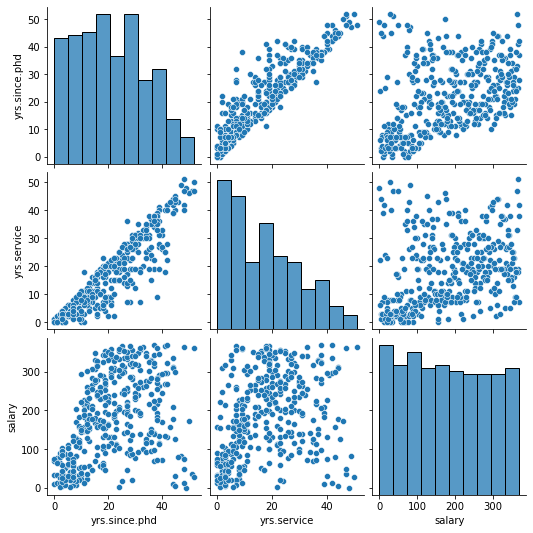

In [121]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['yrs.since.phd', 'yrs.service', 'salary']])

<AxesSubplot:ylabel='count'>

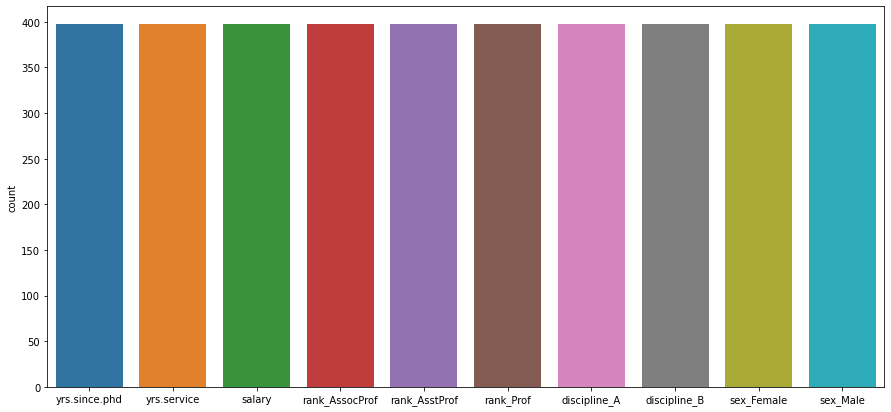

In [93]:
fig = plt.figure(figsize = (15,7))
sns.countplot(data = df)

In [94]:
df1.shape

(397, 10)

In [95]:
df1.columns

Index(['yrs.since.phd', 'yrs.service', 'salary', 'rank_AssocProf',
       'rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B',
       'sex_Female', 'sex_Male'],
      dtype='object')

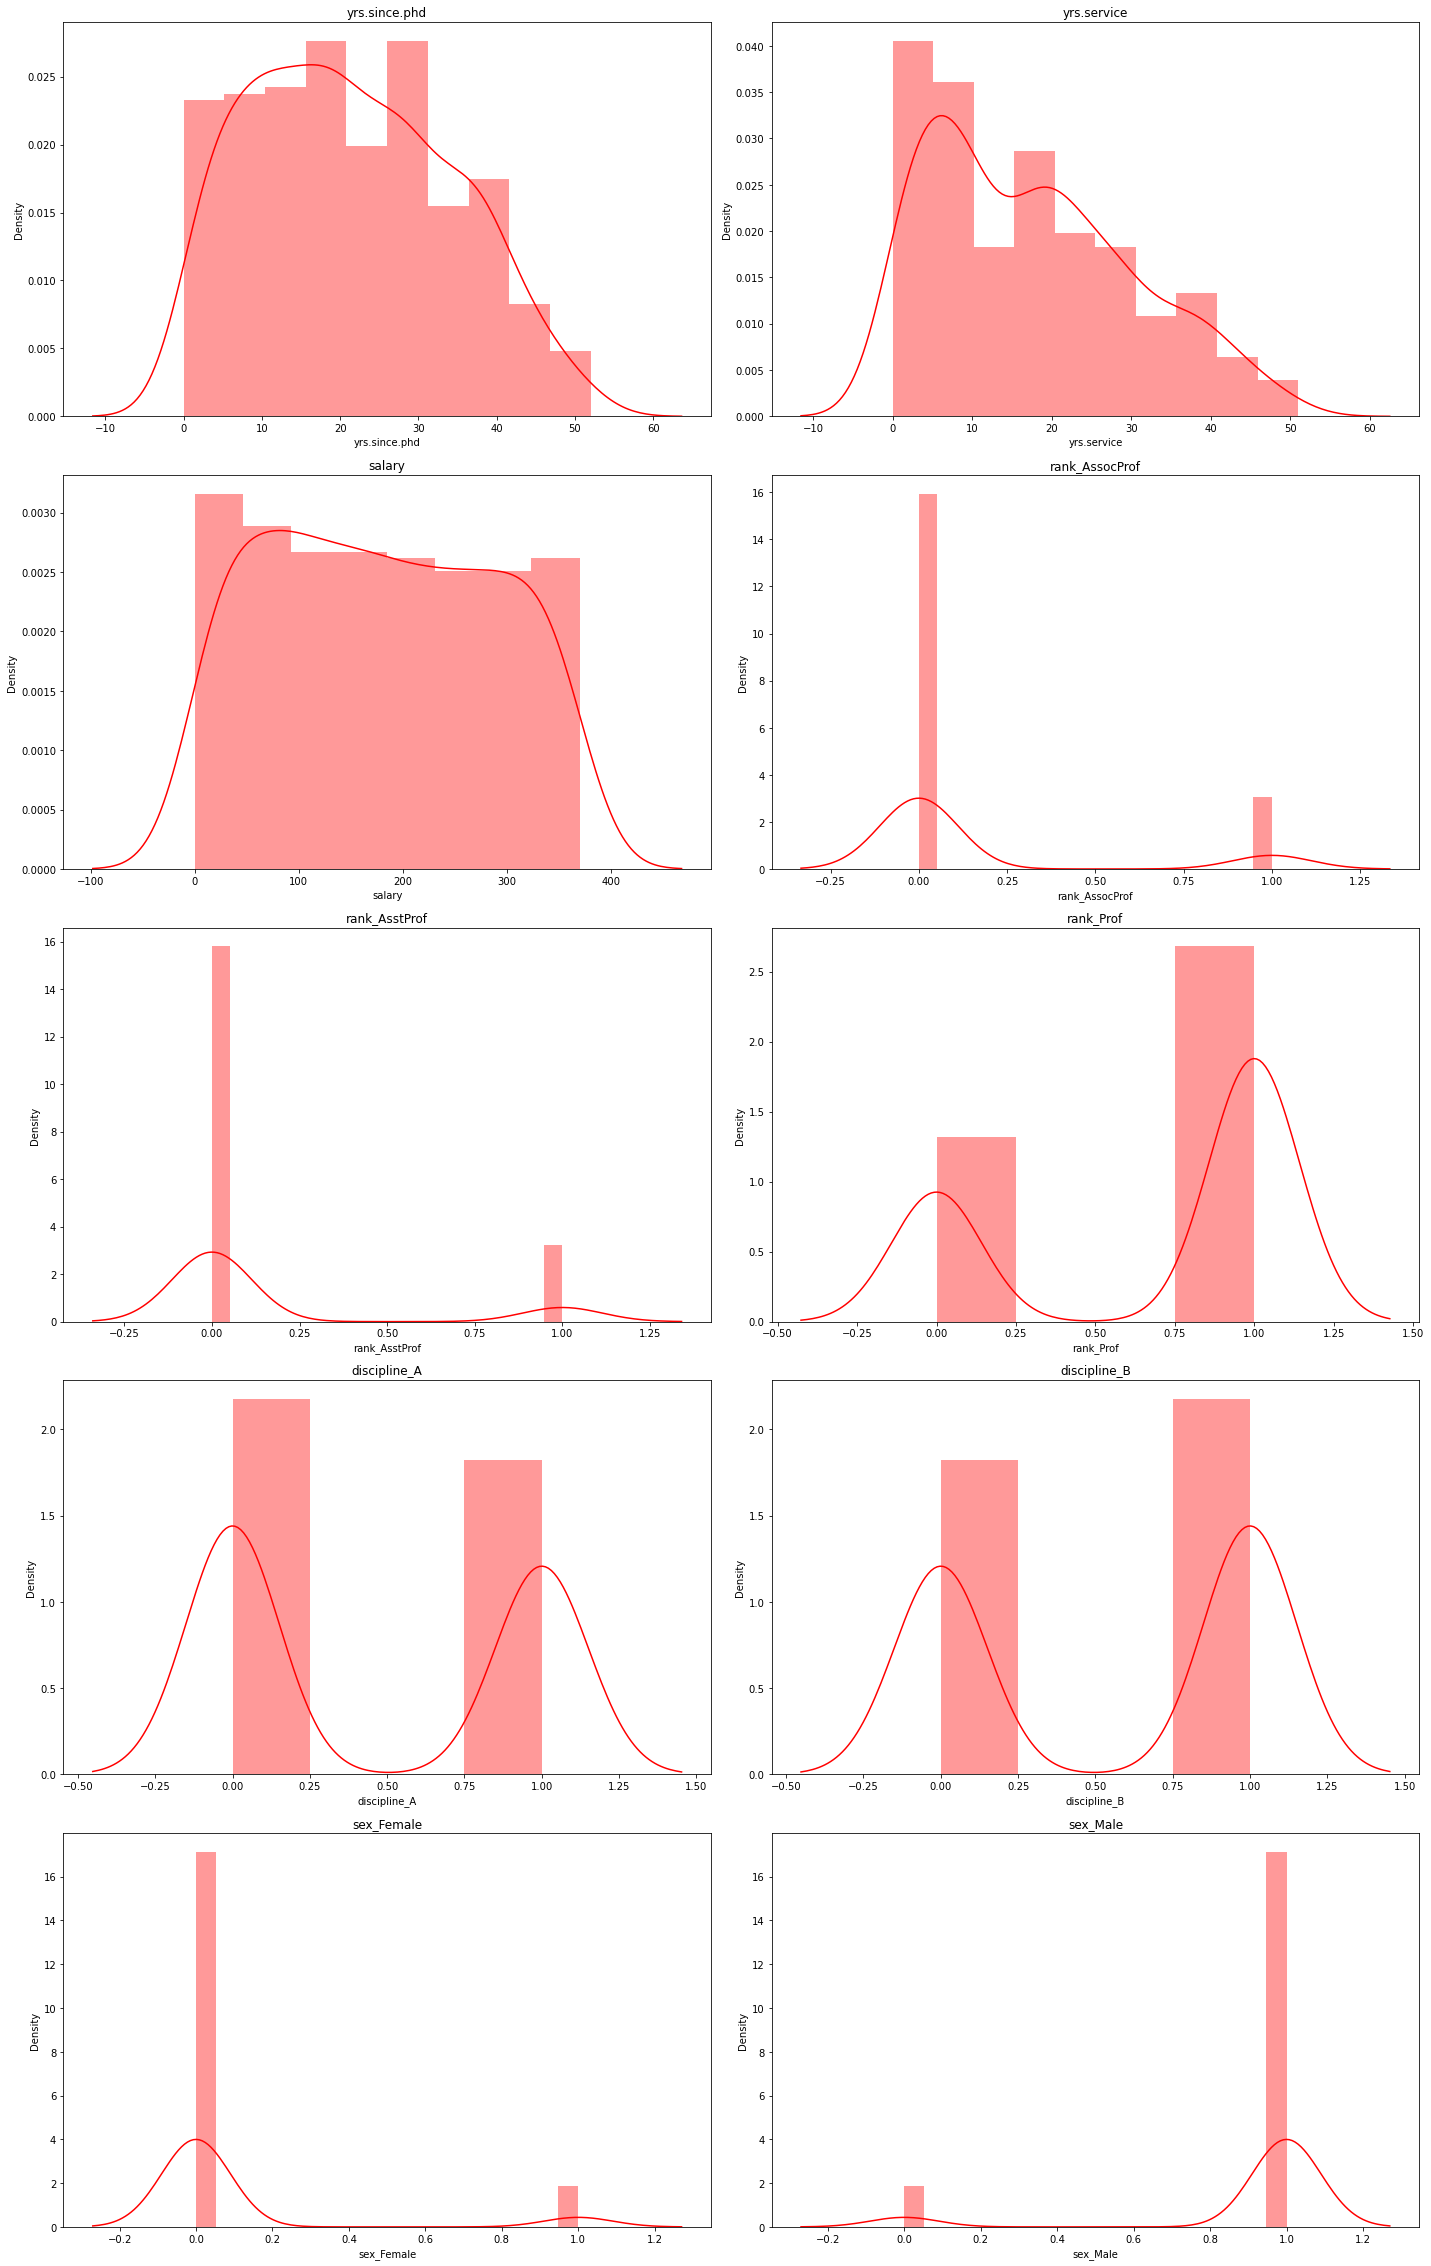

In [96]:
columns = ['yrs.since.phd', 'yrs.service', 'salary', 'rank_AssocProf',
       'rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B',
       'sex_Female', 'sex_Male']
plt.figure(figsize = (20,50))
for i in range(len(columns)):
    plt.subplot(8,2, i+1)
    sns.distplot(df[columns[i]],color = 'r');
    plt.title(columns[i])
plt.tight_layout()

In [97]:
corr_matrix = df1.corr()
corr_matrix

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
yrs.since.phd,1.000000,0.910380,0.430239,-0.233976,-0.604506,0.664506,0.218166,-0.218166,-0.148850,0.148850
yrs.service,0.910380,1.000000,0.354403,-0.194626,-0.536083,0.579230,0.165946,-0.165946,-0.154191,0.154191
salary,0.430239,0.354403,1.000000,-0.301754,-0.551101,0.674972,-0.166957,0.166957,-0.130714,0.130714
rank_AssocProf,-0.233976,-0.194626,-0.301754,1.000000,-0.197537,-0.624702,-0.043720,0.043720,0.085450,-0.085450
rank_AsstProf,-0.604506,-0.536083,-0.551101,-0.197537,1.000000,-0.642075,-0.088399,0.088399,0.099830,-0.099830
rank_Prof,0.664506,0.579230,0.674972,-0.624702,-0.642075,1.000000,0.104606,-0.104606,-0.146347,0.146347
discipline_A,0.218166,0.165946,-0.166957,-0.043720,-0.088399,0.104606,1.000000,-1.000000,0.003724,-0.003724
discipline_B,-0.218166,-0.165946,0.166957,0.043720,0.088399,-0.104606,-1.000000,1.000000,-0.003724,0.003724
sex_Female,-0.148850,-0.154191,-0.130714,0.085450,0.099830,-0.146347,0.003724,-0.003724,1.000000,-1.000000
sex_Male,0.148850,0.154191,0.130714,-0.085450,-0.099830,0.146347,-0.003724,0.003724,-1.000000,1.000000


<AxesSubplot:>

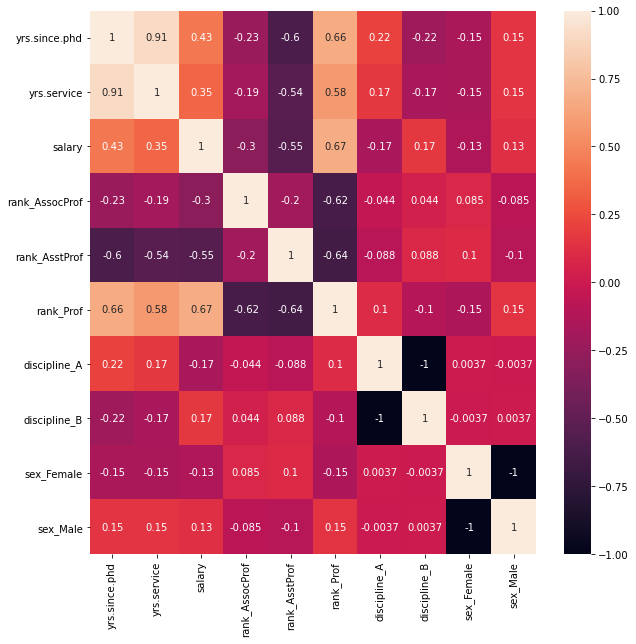

In [98]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix,annot = True)

In [111]:
#splitting the data into independent and dependent datasets
x = df.drop(['salary'],axis = 1)
y = df['salary']

In [106]:
#testing to accpect null hypothsis or not
normaltest(df.salary.values)

NormaltestResult(statistic=258.5666427553787, pvalue=7.127987403429061e-57)

In [117]:
#spliting dataset into training(70%) and testing(30%)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=45)

In [128]:
xtrain.shape

(277, 9)

In [129]:
ytrain.shape

(277,)

In [132]:
error_df = list()

lr = LinearRegression()
lr = lr.fit(xtrain,ytrain)
ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

error_df.append(pd.Series({'train': mean_squared_error(y_train,ytrain_pred),
                          'test':mean_squared_error(y_test,ytest_pred)},name='ordinal_encode'))


error_df = pd.concat(error_df,axis=1)
error_df

,ordinal_encode
train,4900.186356
test,6578.605057


In [135]:
#scaling the data(feature scaling)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**model making**

In [150]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
r2_score(lr_pred,y_test)

0.010551833142750544

In [146]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)
r2_score(dtr_pred,y_test)

0.2968509779169872

In [147]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
r2_score(rfr_pred,y_test)

0.3748859071164655

In [ ]:
# all the score are very to adopt the model.